# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: Lectures 2 and 3 

**Due date: Tuesday, May 24, 2022 at 18:00**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv("spotify.csv", index_col = 0)
spotify_df.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)
print("Training examples: ", df_train.shape[0])
print("Testing examples: ", df_test.shape[0])

Training examples:  1512
Testing examples:  505


#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
c = df_train.describe().iloc[[3, 7]]
c

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
min,0.000005,0.122,16042.0,0.0148,0.000,0.0,0.0188,-33.097,0.0,0.0231,47.859,1.0,0.0359,0.0
max,0.995000,0.984,849960.0,0.9970,0.976,11.0,0.9690,-0.307,1.0,0.8160,219.331,5.0,0.9920,1.0


Speechiness has smallest range

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [5]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

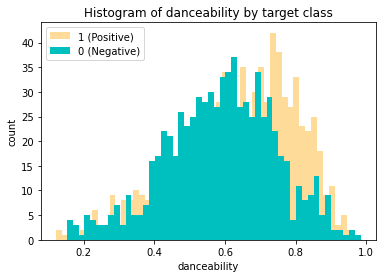

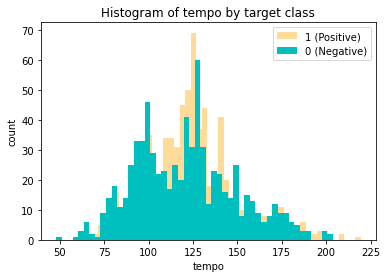

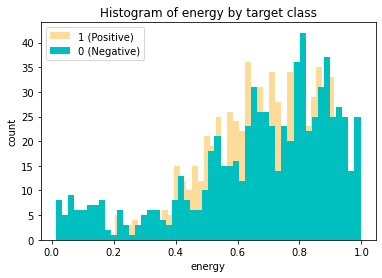

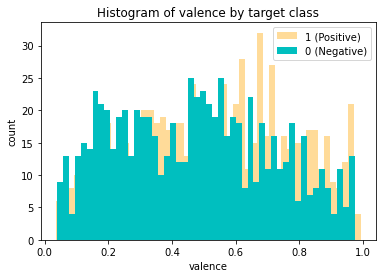

In [6]:
# you could add "loudness" to test and compare to fig provided
for col in ["danceability", "tempo", "energy", "valence"]:
    plt.hist(positive_examples[[col]], bins=50, color="orange",
             label="1 (Positive)", alpha = 0.4)
    plt.hist(negative_examples[[col]], bins=50, color="c",
             label="0 (Negative)")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title("Histogram of " + col + " by target class")
    plt.legend()
    plt.show()
    

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."


A reasonable split would be to predict 0 if `Energy` < 0.2 (and predict 1 otherwise)

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



It means that the feature is not useful, as we would expect same chances of outcomes by making a decision stump in our decision tree 

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [7]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Not at the moment, unless we convert these categorical features to numeric features to support our `DecisionTreeClassifier`.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [8]:
X_train, y_train = df_train.drop(columns=["target", "song_title", "artist"]), df_train["target"]
X_test, y_test = df_test.drop(columns=["target", "song_title", "artist"]), df_test["target"]

In [9]:
model = DecisionTreeClassifier()  # check max depth
model.fit(X_train, y_train)  # Fit a decision tree
print("Train accuracy:  %0.3f" % model.score(X_train, y_train))
print("Test accuracy:   %0.3f" % model.score(X_test, y_test))

Train accuracy:  0.999
Test accuracy:   0.707


#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [10]:
first_ex = X_train.iloc[[0]]
model.predict(first_ex)

array([0], dtype=int64)

Yes, the predicted class of first example matches with the corresponding class in `y_train`

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [11]:
model = DecisionTreeClassifier(max_depth=None)  # Change a max_depth
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print(cv_scores)
print(f"Average cross-validation score = {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.2f}")

[0.65789474 0.68421053 0.69536424 0.68211921 0.63576159 0.70860927
 0.70198675 0.68211921 0.66887417 0.7218543 ]
Average cross-validation score = 0.68
Standard deviation of cross-validation score = 0.02


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [12]:
# Validation Score == Test_Score in cross_validate

In [13]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
sco = pd.DataFrame(scores)
cvs = pd.DataFrame(cv_scores) # from 2c
mean_test_score = sco["test_score"].mean()
mean_train_score = sco["train_score"].mean()
print("mean test score:",mean_test_score)
print("mean train score:",mean_train_score)
sco


mean test score: 0.6779322063436737
mean train score: 0.9994121428880149


,fit_time,score_time,test_score,train_score
0,0.024041,0.000000,0.651316,0.999265
1,0.023993,0.000000,0.671053,1.000000
2,0.016000,0.008000,0.662252,1.000000
3,0.016000,0.008001,0.662252,0.999265
4,0.015961,0.000000,0.642384,0.999265
5,0.016410,0.000000,0.708609,0.999265
6,0.016001,0.008001,0.682119,0.999265
7,0.015999,0.008000,0.662252,0.999265
8,0.016001,0.000000,0.701987,0.999265
9,0.015998,0.000000,0.735099,0.999265


Not exactly the same, this could be of not using a random state when doing the train-test split in the original train and test data, therefore not reproducible results.

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Yes, training scores are all near to 1, whereas cross-validation scores are close to 0.6 - 0.7 , and this is because we did not fix any `max_depth` hyperparameter in the fitting of data.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

The standard deviation of these cross validation scores are small enough, plus, these scores are also close to the mean test score $0.68$, hence we could say these cross validations are trustworthy for conducting further steps of ML.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

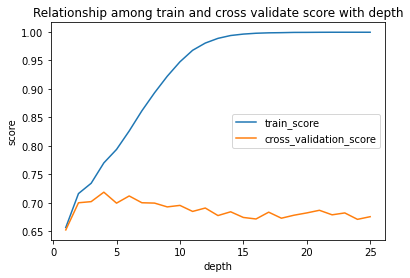

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Adapted from Lecture 3
results_dict = {
    "depth": [],
    "train_score":[],
    "cross_validation_score": [],
}
param_grid = {"max_depth": np.arange(1, 26)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["cross_validation_score"].append(np.mean(scores["test_score"]))
    results_dict["train_score"].append(np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
results_df[["train_score", "cross_validation_score"]].plot(ylabel = "score", title = "Relationship among train and cross validate score with depth");
best_depth_error = np.max(results_df["cross_validation_score"])
best_depth_index = np.argmax(results_df["cross_validation_score"])
best_depth = results_df.index.values[best_depth_index] # max_depth = 4

From above plot we could see when `depth` increases, our training score and cross validation score increases as well, which is expected behavior as we're developing more complicated models that fits well to our data, but notice at some point, our cross validation score stops monotonicly increasing, instead it started to decrease since deeper tree we have, less generalizable is our model to predict unseen data, hence our optimal depth could be at `depth` $= 4$.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [15]:
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train,y_train)
print("Test score is : ", model.score(X_test, y_test))


Test score is :  0.7029702970297029


The test score here is slightly lower than mean cross_validation score from exercise 3 , and this might due to the reason that our original train-test split was not the optimal case (eg. getting test data with more noise or unbalanced distributions). Plus, at question 3, the scores were cross-validated with 10 folds then take mean, which guarantees higer accuracy of the model compared to question 4 (train once and predict test right away).

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

Based on the the first column of the `X` matrix, we could tell when `x >= 5.5` its class is 1, therefore when `x < 5.5`, true would be -1 and false would be 1. And the training accuracy of this decision stump is $83\%$ since we are only predicting one wrong (the case of $x = 2$). Hence with a single decision stump, it would be impossible to score $100\%$ training accuracy in this example.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 